**DATA** **EXPLORATION**

**Using 'Google Stock Dataset' from Kaggle**

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
# required library for visual and stats 
import numpy as np
import pandas as pd #dataset
import seaborn as sns #for graphic effects
import matplotlib.pyplot as plt #to plot
import scipy.stats as stats #statistics 


#fixed frame size
plt.rcParams['figure.figsize'] = [16, 7]

In [3]:
ds=pd.read_csv(r'/content/gdrive/MyDrive/ml datasets/Google.csv')     #dataset imported
print(ds)

            Date         Open         High  ...        Close    Adj Close    Volume
0     2004-08-19    50.050049    52.082081  ...    50.220219    50.220219  44659000
1     2004-08-20    50.555557    54.594593  ...    54.209209    54.209209  22834300
2     2004-08-23    55.430431    56.796795  ...    54.754753    54.754753  18256100
3     2004-08-24    55.675674    55.855854  ...    52.487488    52.487488  15247300
4     2004-08-25    52.532532    54.054054  ...    53.053055    53.053055   9188600
...          ...          ...          ...  ...          ...          ...       ...
4036  2020-08-31  1643.569946  1644.500000  ...  1629.530029  1629.530029   1321100
4037  2020-09-01  1632.160034  1659.219971  ...  1655.079956  1655.079956   1133800
4038  2020-09-02  1668.010010  1726.099976  ...  1717.390015  1717.390015   2476100
4039  2020-09-03  1699.520020  1700.000000  ...  1629.510010  1629.510010   3180200
4040  2020-09-04  1609.000000  1634.989990  ...  1581.209961  1581.209961   

In [4]:
ds.info() # to find detail about the column 
#to find data type use '.dtypes'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4041 entries, 0 to 4040
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4041 non-null   object 
 1   Open       4041 non-null   float64
 2   High       4041 non-null   float64
 3   Low        4041 non-null   float64
 4   Close      4041 non-null   float64
 5   Adj Close  4041 non-null   float64
 6   Volume     4041 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 221.1+ KB


data of coulmn can be changed to make it easy to manipulate or work on it .

.astypes() to any dtypes , .to_numeric() for numbers , .to_datetime() for date and time.

In [5]:
ds["Date"]=pd.to_datetime(ds["Date"]) #date and time type
rd = 2 # round of to this many digit
ds["Open"]=ds["Open"].apply(lambda x: round(x,rd))
ds["High"]=ds["High"].apply(lambda x: round(x,rd))
ds["Low"]=ds["Low"].apply(lambda x: round(x,rd))
ds["Close"]=ds["Close"].apply(lambda x: round(x,rd))
ds["Adj Close"]=ds["Adj Close"].apply(lambda x: round(x,rd))
ds["Volume"]=ds["Volume"] / 1000
ds.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [6]:
# after manipulating the data 
print(ds)

           Date     Open     High      Low    Close  Adj Close     Volume
0    2004-08-19    50.05    52.08    48.03    50.22      50.22  44659.000
1    2004-08-20    50.56    54.59    50.30    54.21      54.21  22834.300
2    2004-08-23    55.43    56.80    54.58    54.75      54.75  18256.100
3    2004-08-24    55.68    55.86    51.84    52.49      52.49  15247.300
4    2004-08-25    52.53    54.05    51.99    53.05      53.05   9188.600
...         ...      ...      ...      ...      ...        ...        ...
4036 2020-08-31  1643.57  1644.50  1625.33  1629.53    1629.53   1321.100
4037 2020-09-01  1632.16  1659.22  1629.53  1655.08    1655.08   1133.800
4038 2020-09-02  1668.01  1726.10  1660.19  1717.39    1717.39   2476.100
4039 2020-09-03  1699.52  1700.00  1607.71  1629.51    1629.51   3180.200
4040 2020-09-04  1609.00  1634.99  1537.97  1581.21    1581.21   2792.533

[4041 rows x 7 columns]


In [7]:
ds.shape # returns a tuple containing the dimensions (rows x columns) of a dataframe.

(4041, 7)

In [8]:
# To get statistics for all the columns at the same time
ds.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4041.000000,4041.000000,4041.000000,4041.000000,4041.000000,4041.000000
mean,533.983130,538.995776,528.658832,533.999089,533.999089,6909.802161
std,383.007926,386.590265,379.488111,383.326005,383.326005,7895.987465
min,49.640000,50.920000,48.030000,50.060000,50.060000,520.600000
25%,241.210000,243.690000,238.870000,241.040000,241.040000,1844.600000
50%,342.590000,345.800000,338.600000,342.180000,342.180000,4191.600000
75%,791.980000,798.000000,786.200000,790.460000,790.460000,8702.600000
max,1699.520000,1726.100000,1660.190000,1717.390000,1717.390000,82151.100000


**MEAN, MEDIAN PARAMETERS
axis : Align object with threshold along the given axis.
skipna : Exclude NA/null values when computing the result
level : If the axis is a MultiIndex (hierarchical), count along a particular level, collapsing into a Series
numeric_only : Include only float, int, boolean columns. If None, will attempt to use everything, then use only numeric data. Not implemented for Series.**

In [9]:
# mean DataFrame.mean(axis=None, skipna=None, level=None, numeric_only=None, **kwargs)
ds.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


Open          533.983130
High          538.995776
Low           528.658832
Close         533.999089
Adj Close     533.999089
Volume       6909.802161
dtype: float64

In [10]:
# median DataFrame.median(axis=None, skipna=None, level=None, numeric_only=None, **kwargs)
ds.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


Open          342.59
High          345.80
Low           338.60
Close         342.18
Adj Close     342.18
Volume       4191.60
dtype: float64

In [11]:
# mode DataFrame.mode(axis=0, numeric_only=False, dropna=True)
ds.mode()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,295.8,236.74,227.73,250.27,250.27,1660.5
1,2004-08-20,NaN,NaN,239.49,290.29,290.29,NaN
2,2004-08-23,NaN,NaN,246.75,291.79,291.79,NaN
3,2004-08-24,NaN,NaN,255.26,300.70,300.70,NaN
4,2004-08-25,NaN,NaN,259.76,308.56,308.56,NaN
...,...,...,...,...,...,...,...
4036,2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN
4037,2020-09-01,NaN,NaN,NaN,NaN,NaN,NaN
4038,2020-09-02,NaN,NaN,NaN,NaN,NaN,NaN
4039,2020-09-03,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# standard deviation DataFrame.std(axis=None, skipna=None, level=None, ddof=1, numeric_only=None, **kwargs)
ds.std()

Open          383.007926
High          386.590265
Low           379.488111
Close         383.326005
Adj Close     383.326005
Volume       7895.987465
dtype: float64

In [13]:
# Applying var() to the dataframe returns variance of each columns
ds.var()

Open         1.466951e+05
High         1.494520e+05
Low          1.440112e+05
Close        1.469388e+05
Adj Close    1.469388e+05
Volume       6.234662e+07
dtype: float64

In [14]:
ds.corr() #correlation between two coloumns

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999891,0.999852,0.999747,0.999747,-0.537342
High,0.999891,1.000000,0.999809,0.999868,0.999868,-0.535615
Low,0.999852,0.999809,1.000000,0.999880,0.999880,-0.539565
Close,0.999747,0.999868,0.999880,1.000000,1.000000,-0.537584
Adj Close,0.999747,0.999868,0.999880,1.000000,1.000000,-0.537584
Volume,-0.537342,-0.535615,-0.539565,-0.537584,-0.537584,1.000000


**Skewness is the measure of the symmetry of a distribution compared to standard normal distribution**

**+ive** - right skewed (mean is to the right of mode/median). Long tail in the +ive direction.

**0**- symmetric

**-ive** - left skewed (mean is to the left of mode/median). Long tail in the -ive direction.

In [15]:
ds.skew() #skewness

Open         0.899843
High         0.905374
Low          0.896944
Close        0.902217
Adj Close    0.902217
Volume       3.134045
dtype: float64

Kurtosis is a measure of the flatness or peakedness of a distribution compared to the normal distribution

**+ive** - Leptokurtosis (sharper/spikier peak compared to the normal distribution)

**0**- Mesokurtic (normal distribution)

**-ive** - Platykurtic (flatter peak compared to the normal distribution)e.g. Uniform distribution

In [16]:
ds.kurtosis()

Open         -0.387475
High         -0.375129
Low          -0.393614
Close        -0.380990
Adj Close    -0.380990
Volume       15.513376
dtype: float64

**MIN MAX OF EACH COLUMN**

In [17]:
ds.min()

Date         2004-08-19 00:00:00
Open                       49.64
High                       50.92
Low                        48.03
Close                      50.06
Adj Close                  50.06
Volume                     520.6
dtype: object

In [18]:
ds.max()

Date         2020-09-04 00:00:00
Open                     1699.52
High                      1726.1
Low                      1660.19
Close                    1717.39
Adj Close                1717.39
Volume                   82151.1
dtype: object

**Data Visualisation**

     1.Scatter Plot needs x and y axis column

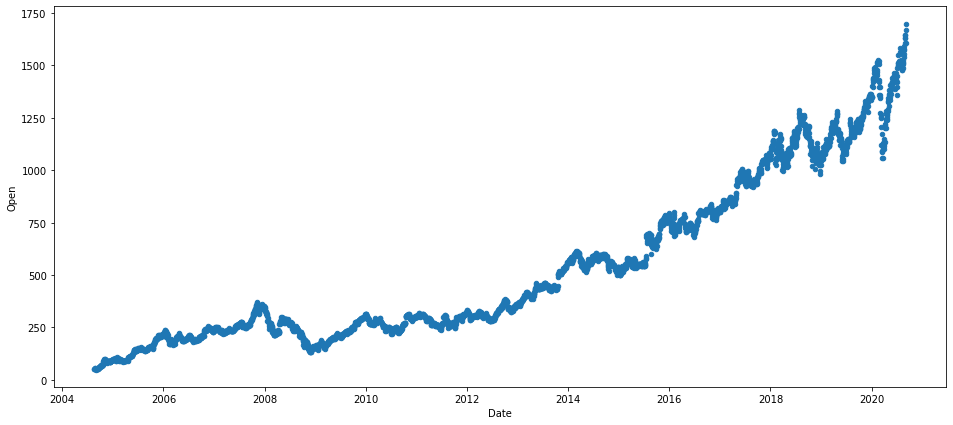

In [19]:
ds.plot(kind = 'scatter', x = 'Date', y = 'Open')

plt.show()

2. Histogram needs only one column

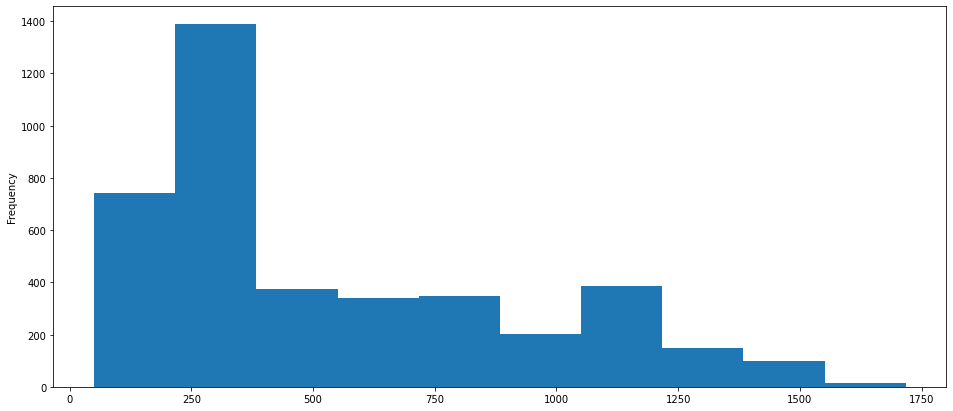

In [20]:
ds['Close'].plot(kind='hist')

     3.Distribution plot using seaborn

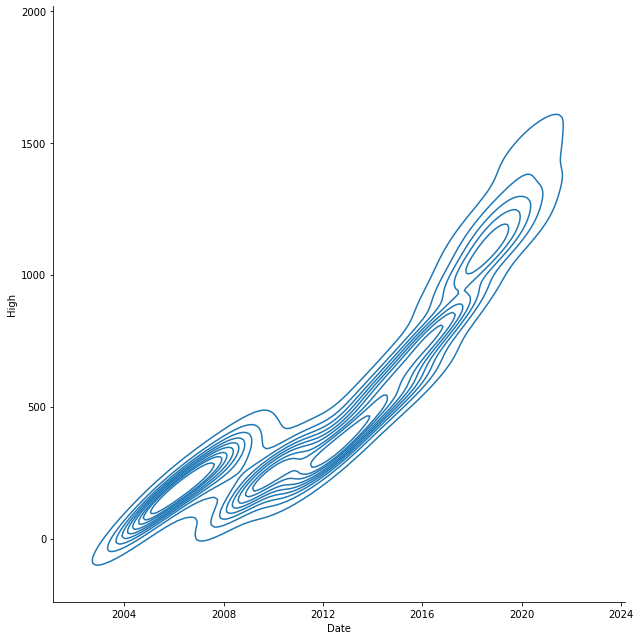

In [21]:
sns.displot(data=ds,x='Date',y='High',kind='kde',height=9) # kernel density estimates 
plt.show()

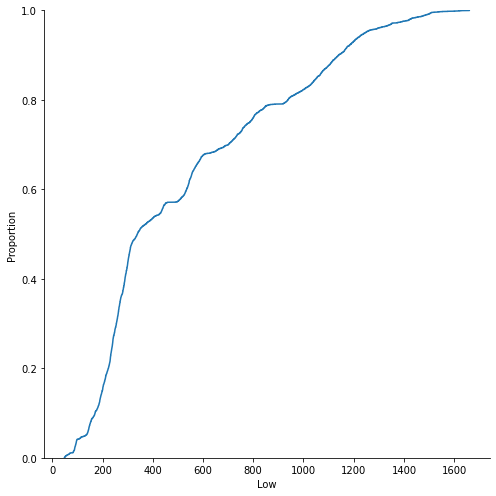

In [22]:
sns.displot(data=ds,x='Low',kind='ecdf',height=7) # empirical cumulative distribution functions
plt.show()

4. Using matplotlib library

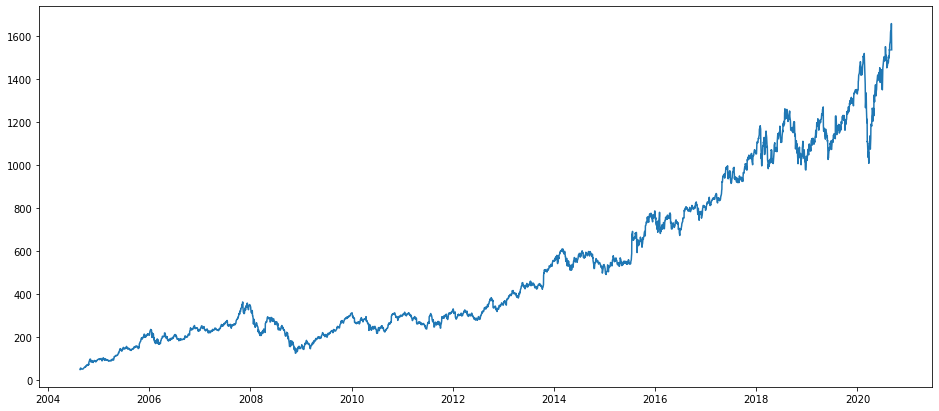

In [23]:
plt.plot(ds['Date'], ds['Low']) #plot function
plt.rcParams["figure.figsize"] = (16,16)
plt.show()

i)marker are pattern for dot style

ii)line for line style type

iii)color for line colour

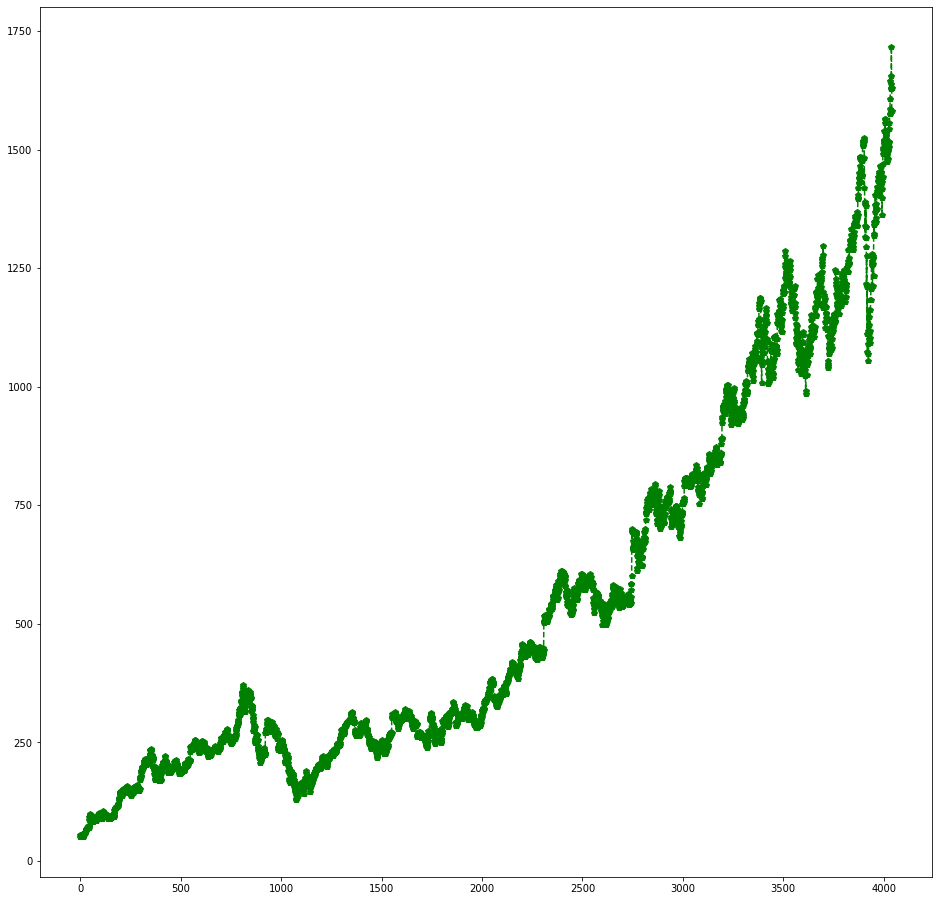

In [24]:
plt.plot(ds['Adj Close'], 'p--g')
plt.rcParams["figure.figsize"] = (14,15)

Using Subplot to plot 4 grids

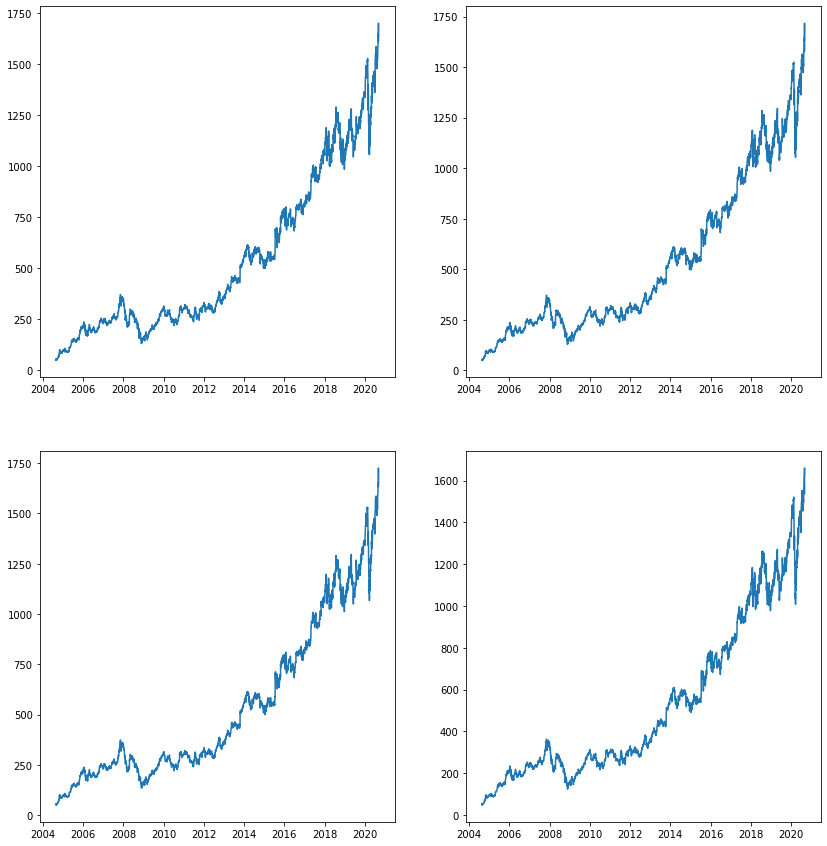

In [25]:
# first number = rows, second number = coloumn , third number = current plot
plt.subplot(2, 2, 1)
plt.plot(ds['Date'],ds['Open'])
plt.subplot(2, 2, 2)
plt.plot(ds['Date'],ds['Close'])
plt.subplot(2, 2, 3)
plt.plot(ds['Date'],ds['High'])
plt.subplot(2, 2, 4)
plt.plot(ds['Date'],ds['Low'])

**5.Bar chart x-y graph**

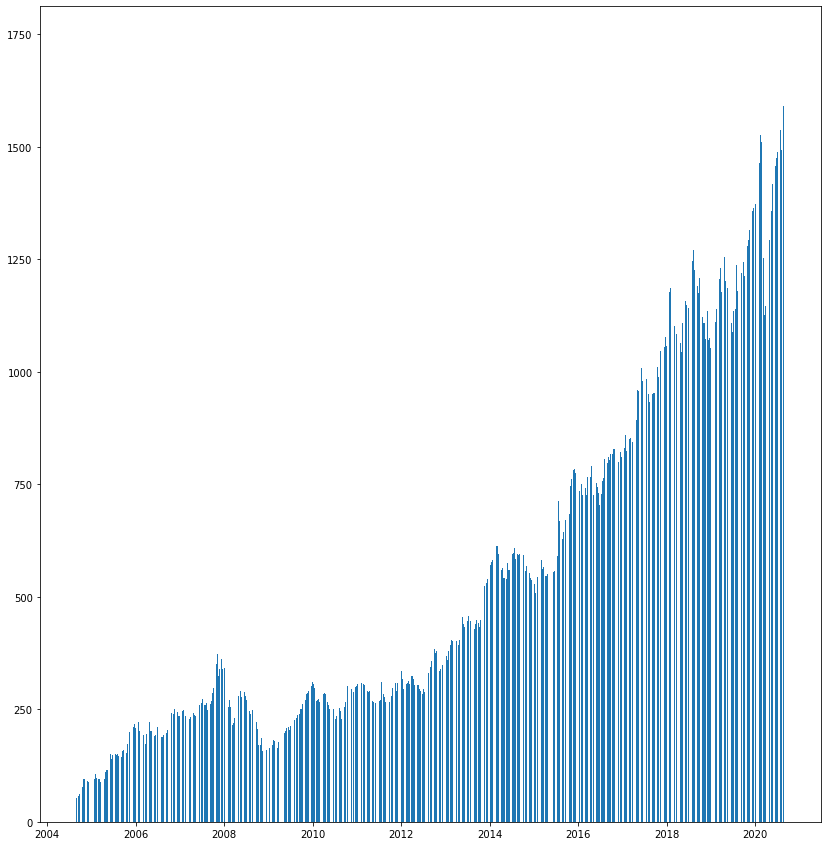

In [26]:
plt.bar(ds["Date"],ds['High'])
plt.show()

6. Pie chart

In [27]:
dk=ds.groupby([ds['Date'].dt.year]).High.mean() # grouped the high column data according to year to draw pie chart
print(dk)

Date
2004      77.427553
2005     140.639127
2006     208.419203
2007     272.360438
2008     237.408063
2009     222.215873
2010     270.744881
2011     287.470238
2012     324.462560
2013     445.514762
2014     572.842024
2015     625.693571
2016     769.408810
2017     945.217331
2018    1134.963466
2019    1199.716746
2020    1419.725523
Name: High, dtype: float64


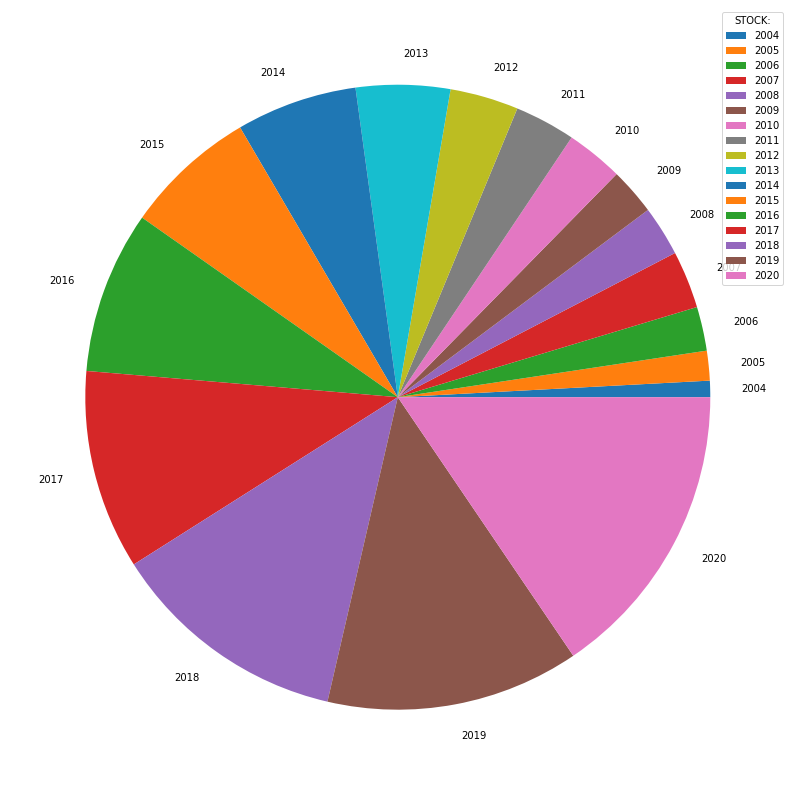

In [29]:
plt.pie(dk,labels=[x for x in range(2004,2021)])
plt.legend(title = "STOCK:")
plt.rcParams["figure.figsize"] = (16,16)
plt.show()

7. Boxplot

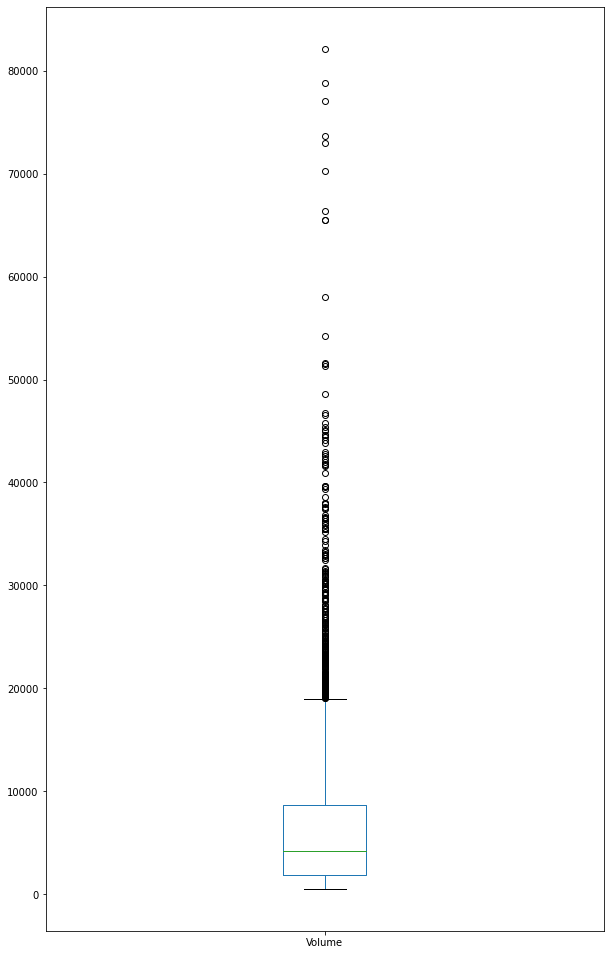

In [30]:
# Box plot of a column
ds['Volume'].plot.box(figsize=(10, 17));

8. Lineplot

Text(0, 0.5, 'Close')

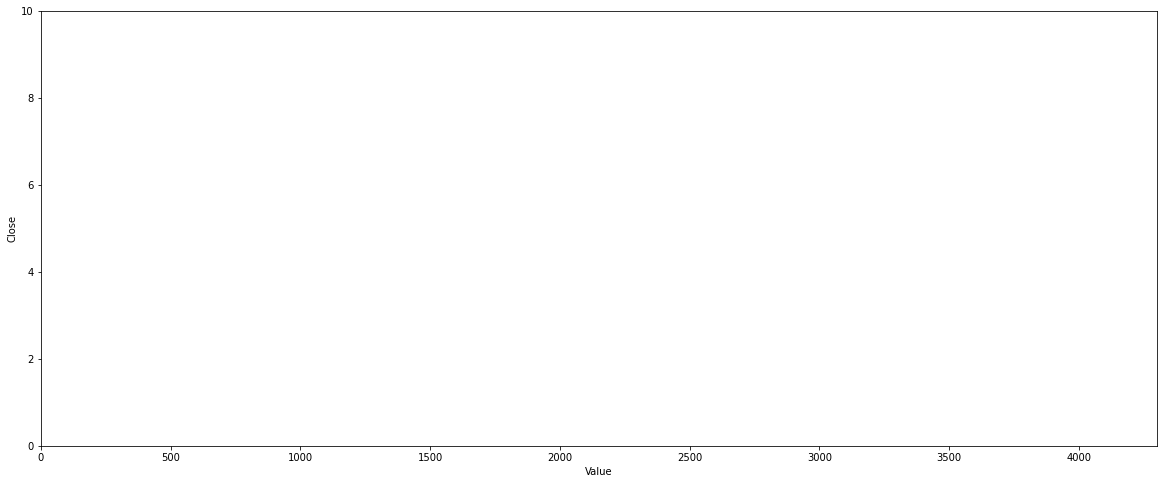

In [33]:
# Plotting with index along the x-axis
ds['Close'].plot(figsize=(20, 8), color='blue') # color and figsize changed

plt.xlim(0, 4300) # range for x-axis
plt.ylim(0, 10) # range for x-axis
plt.xlabel('Value')
plt.ylabel('Close') # ";" prevents object info from displaying